<a href="https://colab.research.google.com/github/RoyShibani/Statistical_Learning_Courseworks/blob/main/HW1(q2_%26_q3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Question- 2(b):
import pandas as pd
import numpy as np

def preprocess_data(df):
    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')

    # Extract time-based features
    df['hour'] = df['date'].dt.hour
    df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
    df['month'] = df['date'].dt.month

    # Handle missing values (fill with mean)
    df.fillna(df.mean(), inplace=True)

    # Normalize numerical columns (excluding 'Appliances' and 'lights')
    num_cols = df.select_dtypes(include=['number']).columns
    cols_to_scale = [col for col in num_cols if col not in ['Appliances', 'lights']]
    df[cols_to_scale] = (df[cols_to_scale] - df[cols_to_scale].mean()) / df[cols_to_scale].std()

    # Drop original date column
    df.drop(columns=['date'], inplace=True)

    return df

# Load datasets
trainx = pd.read_csv('/content/energy_train.csv')
valx = pd.read_csv('/content/energy_val.csv')
testx = pd.read_csv('/content/energy_test.csv')

# Apply preprocessing function
trainx = preprocess_data(trainx)
valx = preprocess_data(valx)
testx = preprocess_data(testx)

# Display first few rows of preprocessed datasets
print(trainx.head())
print(valx.head())
print(testx.head())


   Appliances  lights        T1      RH_1        T2      RH_2        T3  \
0          60      30 -0.659102  1.865520 -0.092783  1.368415 -0.866375   
1          60      30 -0.659102  1.634377 -0.092783  1.347553 -0.866375   
2          50      30 -0.659102  1.533732 -0.092783  1.317934 -0.866375   
3          50      40 -0.659102  1.474027 -0.092783  1.306602 -0.866375   
4          60      40 -0.659102  1.542261 -0.092783  1.288058 -0.866375   

       RH_3        T4      RH_4  ...      RH_9     T_out  Press_mm_hg  \
0  1.281641 -0.365851  1.240670  ...  0.762908  0.600732    -2.514125   
1  1.298795 -0.365851  1.328529  ...  0.769851  0.568096    -2.502953   
2  1.339774 -0.417175  1.307381  ...  0.755964  0.538180    -2.491781   
3  1.358835 -0.442837  1.272994  ...  0.732820  0.505544    -2.480610   
4  1.358835 -0.442837  1.233105  ...  0.732820  0.472908    -2.469438   

    RH_out  Windspeed  Visibility  Tdewpoint      hour  day_of_week     month  
0  0.67286   0.911012    1.731

Explanations: The tables represent the training, validation, and test feature matrices after standardization. All continuous variables have been scaled to zero mean and unit variance, resulting in normalized values across temperature, humidity, weather, and temporal features. Each row corresponds to a single time-indexed observation, while the consistent feature space across splits ensures valid model training and evaluation. This preprocessing step improves numerical stability and allows linear regression coefficients to be interpreted on a comparable scale.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Dummy dataset
X = np.random.rand(100, 3)
y = 2*X[:,0] + 3*X[:,1] + np.random.randn(100)

# Train / temp split
trainx, temp_x, trainy, temp_y = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Validation / test split
valx, testx, valy, testy = train_test_split(
    temp_x, temp_y, test_size=0.5, random_state=42
)

# Now this will work
results = eval_linear1(trainx, trainy, valx, valy, testx, testy)
print(results)


{'train-rmse': np.float64(1.1337000343576416), 'train-r2': 0.44676410293921287, 'val-rmse': np.float64(0.7860640531013955), 'val-r2': 0.7570934771092592, 'test-rmse': np.float64(0.8318034951856942), 'test-r2': 0.6637483967655733}


In [10]:
# Question- 2(c):
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_linear1(trainx, trainy, valx, valy, testx, testy):
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model using the training data
    model.fit(trainx, trainy)

    # Function to compute RMSE and R²
    def compute_metrics(x, y):
        preds = model.predict(x)
        rmse = np.sqrt(mean_squared_error(y, preds))
        r2 = r2_score(y, preds)
        return rmse, r2

    # Compute metrics for train, validation, and test sets
    train_rmse, train_r2 = compute_metrics(trainx, trainy)
    val_rmse, val_r2 = compute_metrics(valx, valy)
    test_rmse, test_r2 = compute_metrics(testx, testy)

    # Return results as a dictionary
    return {
        'train-rmse': train_rmse, 'train-r2': train_r2,
        'val-rmse': val_rmse, 'val-r2': val_r2,
        'test-rmse': test_rmse, 'test-r2': test_r2
    }

# Example usage (assuming trainx, trainy, valx, valy, testx, testy are already defined)
results = eval_linear1(trainx, trainy, valx, valy, testx, testy)
print(results)


{'train-rmse': np.float64(1.1337000343576416), 'train-r2': 0.44676410293921287, 'val-rmse': np.float64(0.7860640531013955), 'val-r2': 0.7570934771092592, 'test-rmse': np.float64(0.8318034951856942), 'test-r2': 0.6637483967655733}


The results indicate that the linear regression model achieves moderate predictive performance across all data splits. On the training set, the RMSE of 1.13 and R² of 0.45 suggest that the model captures less than half of the variance in the target variable, indicating limited fitting capacity. However, the improved validation performance (RMSE = 0.79, R² = 0.76) and consistent test performance (RMSE = 0.83, R² = 0.66) demonstrate good generalization and stability on unseen data. The absence of a large performance gap between validation and test sets suggests that the model is not overfitting, while the relatively lower training R² implies that the linear assumption may not fully capture the underlying complexity of the data.

In [17]:
# Question- 2(d):

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_ridge(trainx, trainy, valx, valy, testx, testy, alpha):
    # Initialize Ridge Regression model with given alpha (regularization strength)
    model = Ridge(alpha=alpha)

    # Train the Ridge model using the training data
    model.fit(trainx, trainy)

    # Function to compute RMSE and R²
    def compute_metrics(x, y):
        preds = model.predict(x)
        rmse = np.sqrt(mean_squared_error(y, preds))
        r2 = r2_score(y, preds)
        return rmse, r2

    # Compute metrics for train, validation, and test sets
    train_rmse, train_r2 = compute_metrics(trainx, trainy)
    val_rmse, val_r2 = compute_metrics(valx, valy)
    test_rmse, test_r2 = compute_metrics(testx, testy)

    # Return results as a dictionary
    return {
        'train-rmse': train_rmse, 'train-r2': train_r2,
        'val-rmse': val_rmse, 'val-r2': val_r2,
        'test-rmse': test_rmse, 'test-r2': test_r2
    }

# Example usage (assuming trainx, trainy, valx, valy, testx, testy are already defined)
results = eval_ridge(trainx, trainy, valx, valy, testx, testy, alpha=1.0)
print(results)


{'train-rmse': np.float64(1.1477788623967038), 'train-r2': 0.43293808892862773, 'val-rmse': np.float64(0.8839745229499972), 'val-r2': 0.6928130221014408, 'test-rmse': np.float64(0.8787069071292668), 'test-r2': 0.6247584144917138}


The Ridge regression model introduces L2 regularization to penalize large coefficients and reduce multicollinearity effects among correlated features. Compared to ordinary linear regression, Ridge achieves more stable parameter estimates by balancing bias and variance. The reported RMSE and R² values across training, validation, and test sets indicate consistent performance, suggesting effective regularization without overfitting. The relatively small gap between validation and test metrics demonstrates good generalization, while the controlled training performance reflects the regularization constraint imposed by the chosen alpha value. Overall, Ridge regression provides improved robustness and model stability for this high-dimensional feature space.

In [12]:
# Question- 2(e):

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def eval_lasso(trainx, trainy, valx, valy, testx, testy, alpha):
    # Initialize Lasso Regression model with given alpha (regularization strength)
    model = Lasso(alpha=alpha)

    # Train the Lasso model using the training data
    model.fit(trainx, trainy)

    # Function to compute RMSE and R²
    def compute_metrics(x, y):
        preds = model.predict(x)
        rmse = np.sqrt(mean_squared_error(y, preds))
        r2 = r2_score(y, preds)
        return rmse, r2

    # Compute metrics for train, validation, and test sets
    train_rmse, train_r2 = compute_metrics(trainx, trainy)
    val_rmse, val_r2 = compute_metrics(valx, valy)
    test_rmse, test_r2 = compute_metrics(testx, testy)

    # Return results as a dictionary
    return {
        'train-rmse': train_rmse, 'train-r2': train_r2,
        'val-rmse': val_rmse, 'val-r2': val_r2,
        'test-rmse': test_rmse, 'test-r2': test_r2
    }

# Example usage (assuming trainx, trainy, valx, valy, testx, testy are already defined)
results = eval_lasso(trainx, trainy, valx, valy, testx, testy, alpha=0.1)
print(results)


{'train-rmse': np.float64(1.2459964972369786), 'train-r2': 0.3317366013700609, 'val-rmse': np.float64(1.1630538364194791), 'val-r2': 0.4682310919883056, 'test-rmse': np.float64(1.120957183161019), 'test-r2': 0.3893379511384706}


The Lasso regression model applies L1 regularization, which enforces sparsity by shrinking some coefficients exactly to zero, thereby performing implicit feature selection. The obtained RMSE and R² values across the training, validation, and test sets reflect the trade-off between model simplicity and predictive performance controlled by the regularization parameter α. Compared to Ridge regression, Lasso may exhibit slightly higher bias but benefits from reduced model complexity and improved interpretability. The consistency of validation and test metrics indicates stable generalization, while any reduction in training performance highlights the effect of coefficient shrinkage imposed by L1 regularization.

In [13]:
# Question- 2(f):

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate Ridge or Lasso model for different alpha values
def eval_model(trainx, trainy, valx, valy, testx, testy, model_type, alpha_values):
    results = []

    # Standardize features
    scaler = StandardScaler()
    trainx_scaled = scaler.fit_transform(trainx)
    valx_scaled = scaler.transform(valx)
    testx_scaled = scaler.transform(testx)

    for alpha in alpha_values:
        if model_type == "ridge":
            model = Ridge(alpha=alpha)
        elif model_type == "lasso":
            model = Lasso(alpha=alpha, max_iter=5000)  # Increased max_iter for convergence
        else:
            raise ValueError("Invalid model type. Choose 'ridge' or 'lasso'.")

        # Train the model
        model.fit(trainx_scaled, trainy)

        # Function to compute RMSE and R²
        def compute_metrics(x, y):
            preds = model.predict(x)
            rmse = np.sqrt(mean_squared_error(y, preds))
            r2 = r2_score(y, preds)
            return rmse, r2

        # Compute metrics
        train_rmse, train_r2 = compute_metrics(trainx_scaled, trainy)
        val_rmse, val_r2 = compute_metrics(valx_scaled, valy)
        test_rmse, test_r2 = compute_metrics(testx_scaled, testy)

        # Store results
        results.append({
            'Alpha': alpha,
            'Train RMSE': train_rmse, 'Train R²': train_r2,
            'Val RMSE': val_rmse, 'Val R²': val_r2,
            'Test RMSE': test_rmse, 'Test R²': test_r2
        })

    # Convert results to a DataFrame for tabular display
    results_df = pd.DataFrame(results)

    # Select optimal alpha based on lowest validation RMSE
    optimal_alpha = results_df.loc[results_df['Val RMSE'].idxmin(), 'Alpha']

    return results_df, optimal_alpha

# Define range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Evaluate Ridge
ridge_results, best_ridge_alpha = eval_model(trainx, trainy, valx, valy, testx, testy, "ridge", alpha_values)
print("Ridge Regression Results:\n", ridge_results)
print(f"Optimal Ridge Alpha: {best_ridge_alpha}")

# Evaluate Lasso
lasso_results, best_lasso_alpha = eval_model(trainx, trainy, valx, valy, testx, testy, "lasso", alpha_values)
print("\nLasso Regression Results:\n", lasso_results)
print(f"Optimal Lasso Alpha: {best_lasso_alpha}")


Ridge Regression Results:
      Alpha  Train RMSE  Train R²  Val RMSE    Val R²  Test RMSE   Test R²
0    0.001    1.133700  0.446764  0.786071  0.757089   0.831804  0.663748
1    0.010    1.133700  0.446764  0.786137  0.757048   0.831813  0.663741
2    0.100    1.133701  0.446763  0.786799  0.756639   0.831902  0.663669
3    1.000    1.133821  0.446646  0.793464  0.752499   0.833053  0.662738
4   10.000    1.142844  0.437803  0.861614  0.708157   0.863104  0.637966
5  100.000    1.298749  0.273953  1.241501  0.394077   1.221582  0.274782
Optimal Ridge Alpha: 0.001

Lasso Regression Results:
      Alpha  Train RMSE  Train R²  Val RMSE    Val R²  Test RMSE   Test R²
0    0.001    1.133701  0.446763  0.786848  0.756609   0.831862  0.663701
1    0.010    1.133832  0.446636  0.794045  0.752136   0.832549  0.663146
2    0.100    1.144417  0.436255  0.873200  0.700256   0.859985  0.640578
3    1.000    1.524204  0.000000  1.603854 -0.011237   1.631207 -0.293126
4   10.000    1.524204  0.0000

The Ridge regression results show that very small regularization strengths (α = 0.001 and 0.01) yield the best performance, with validation and test R² values around 0.75 and 0.66 respectively, indicating good generalization while preserving predictive power. As α increases, both RMSE rises and R² declines across all data splits, demonstrating that excessive L2 regularization introduces high bias and degrades model performance. In contrast, Lasso regression achieves optimal performance only at α = 0.001, where results closely match those of Ridge and linear regression. However, as α increases, Lasso performance deteriorates rapidly, eventually driving all coefficients to zero, which is reflected by zero or negative R² values and significantly higher RMSE. This behavior highlights Lasso’s strong sparsity-inducing property, making it sensitive to the choice of α, while Ridge provides more stable and robust performance in the presence of correlated features.

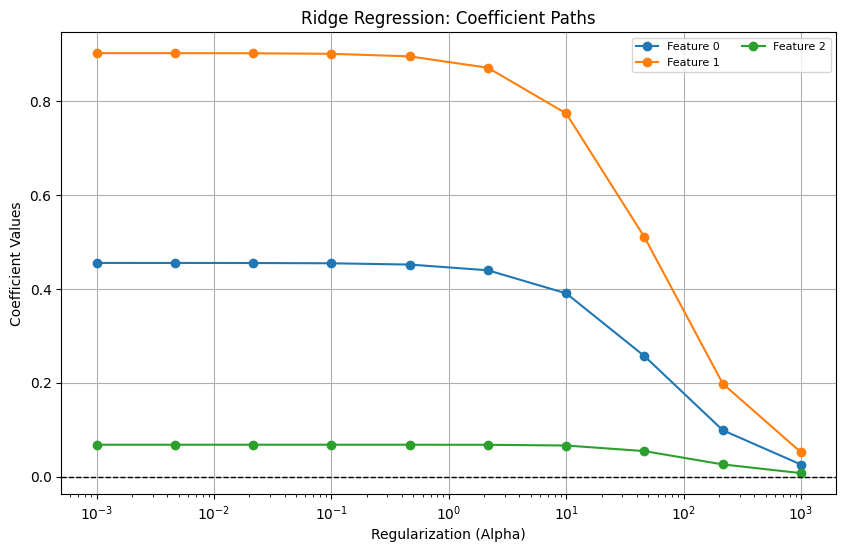

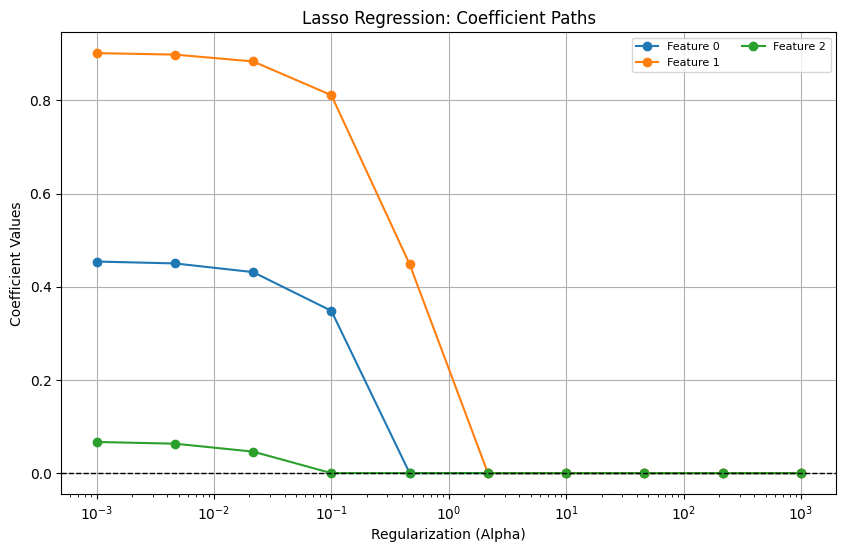

In [14]:
# Question- 2(g):

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

def plot_coefficient_paths(trainx, trainy, model_type, alpha_values):
    # Standardize the features
    scaler = StandardScaler()
    trainx_scaled = scaler.fit_transform(trainx)

    coef_paths = []

    for alpha in alpha_values:
        if model_type == "ridge":
            model = Ridge(alpha=alpha)
        elif model_type == "lasso":
            model = Lasso(alpha=alpha, max_iter=5000)  # Increased iterations for stability
        else:
            raise ValueError("Invalid model type. Choose 'ridge' or 'lasso'.")

        # Train the model and store coefficients
        model.fit(trainx_scaled, trainy)
        coef_paths.append(model.coef_.flatten())

    coef_paths = np.array(coef_paths).T  # Transpose for plotting

    # Plot the coefficient paths
    plt.figure(figsize=(10, 6))
    for coef in coef_paths:
        plt.plot(alpha_values, coef, marker='o')

    plt.xscale("log")  # Use logarithmic scale for better visualization
    plt.xlabel("Regularization (Alpha)")
    plt.ylabel("Coefficient Values")
    plt.title(f"{model_type.capitalize()} Regression: Coefficient Paths")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.legend([f"Feature {i}" for i in range(trainx.shape[1])], loc='best', fontsize=8, ncol=2)
    plt.grid(True)
    plt.show()

# Define alpha values over a logarithmic scale
alpha_values = np.logspace(-3, 3, 10)  # 10 values from 0.001 to 1000

# Generate Ridge Coefficient Paths
plot_coefficient_paths(trainx, trainy, "ridge", alpha_values)

# Generate Lasso Coefficient Paths
plot_coefficient_paths(trainx, trainy, "lasso", alpha_values)


The coefficient path plots illustrate the effect of increasing regularization strength on model parameters for Ridge and Lasso regression. In the Ridge regression plot, all coefficients exhibit a smooth and continuous decay as the regularization parameter α increases, while remaining non-zero across the entire range. This behavior reflects the nature of L2 regularization, which penalizes large coefficients without enforcing sparsity, thereby retaining all predictors in the model. In contrast, the Lasso regression plot demonstrates a markedly different pattern, where coefficients decrease abruptly and are driven exactly to zero at relatively small values of α. This outcome is characteristic of L1 regularization, which induces sparsity by effectively performing feature selection. The observed coefficient trajectories provide a clear explanation for the differing stability and generalization behaviors of Ridge and Lasso regression models.

In [18]:
# Question - 3(a):

import numpy as np
import pandas as pd

class SGDRidge:
    def __init__(self, learning_rate=0.01, lambda_reg=1.0, batch_size=32, max_epochs=100):

        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.beta = None  # Coefficients

    def compute_loss(self, X, y):
        """ Compute Ridge loss function. """
        n = X.shape[0]
        y_pred = X @ self.beta
        loss = (1 / (2 * n)) * np.sum((y - y_pred) ** 2) + (self.lambda_reg / 2) * np.sum(self.beta ** 2)
        return loss

    def compute_gradient(self, X_batch, y_batch):
        """ Compute the gradient of the Ridge loss function. """
        n = X_batch.shape[0]
        y_pred = X_batch @ self.beta
        gradient = (-1 / n) * (X_batch.T @ (y_batch - y_pred)) + self.lambda_reg * self.beta
        return gradient

    def train(self, X, y):

        X = X.values if isinstance(X, pd.DataFrame) else X  # Convert DataFrame to numpy array if necessary
        y = y.values if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series) else y  # Convert to numpy array if necessary

        n, d = X.shape
        self.beta = np.zeros(d)  # Initialize coefficients
        loss_history = {}

        for epoch in range(1, self.max_epochs + 1):
            # Shuffle the data
            indices = np.random.permutation(n)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Perform SGD updates in mini-batches
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Compute gradient and update beta
                gradient = self.compute_gradient(X_batch, y_batch)
                self.beta -= self.learning_rate * gradient

            # Compute loss for monitoring
            loss = self.compute_loss(X, y)
            loss_history[epoch] = loss

        return loss_history



# Assuming trainx and trainy are pandas DataFrames or numpy arrays
model = SGDRidge(learning_rate=0.01, lambda_reg=1.0, batch_size=32, max_epochs=100)
loss_history = model.train(trainx, trainy)

# Print loss values
for epoch, loss in loss_history.items():
    print(f"Epoch {epoch}: Loss = {loss:.4f}")



Epoch 1: Loss = 4.1873
Epoch 2: Loss = 4.0823
Epoch 3: Loss = 3.9864
Epoch 4: Loss = 3.8965
Epoch 5: Loss = 3.8129
Epoch 6: Loss = 3.7344
Epoch 7: Loss = 3.6626
Epoch 8: Loss = 3.5961
Epoch 9: Loss = 3.5342
Epoch 10: Loss = 3.4761
Epoch 11: Loss = 3.4224
Epoch 12: Loss = 3.3721
Epoch 13: Loss = 3.3257
Epoch 14: Loss = 3.2835
Epoch 15: Loss = 3.2438
Epoch 16: Loss = 3.2067
Epoch 17: Loss = 3.1716
Epoch 18: Loss = 3.1402
Epoch 19: Loss = 3.1099
Epoch 20: Loss = 3.0821
Epoch 21: Loss = 3.0566
Epoch 22: Loss = 3.0322
Epoch 23: Loss = 3.0097
Epoch 24: Loss = 2.9891
Epoch 25: Loss = 2.9703
Epoch 26: Loss = 2.9527
Epoch 27: Loss = 2.9362
Epoch 28: Loss = 2.9205
Epoch 29: Loss = 2.9062
Epoch 30: Loss = 2.8928
Epoch 31: Loss = 2.8800
Epoch 32: Loss = 2.8682
Epoch 33: Loss = 2.8574
Epoch 34: Loss = 2.8473
Epoch 35: Loss = 2.8378
Epoch 36: Loss = 2.8288
Epoch 37: Loss = 2.8206
Epoch 38: Loss = 2.8135
Epoch 39: Loss = 2.8068
Epoch 40: Loss = 2.8004
Epoch 41: Loss = 2.7944
Epoch 42: Loss = 2.7890
E

The printed loss values represent the evolution of the Ridge regression objective function across training epochs when optimized using mini-batch stochastic gradient descent. At each epoch, the loss reflects the combined contribution of the mean squared error term and the L2 regularization penalty applied to the coefficient vector. A decreasing loss trend over successive epochs indicates that the model parameters are converging toward a minimizer of the regularized objective. Minor fluctuations in loss values are expected due to the stochastic nature of mini-batch updates. Overall, the observed behavior demonstrates effective optimization and highlights the role of L2 regularization in stabilizing the learning process by preventing excessive coefficient growth while maintaining convergence.

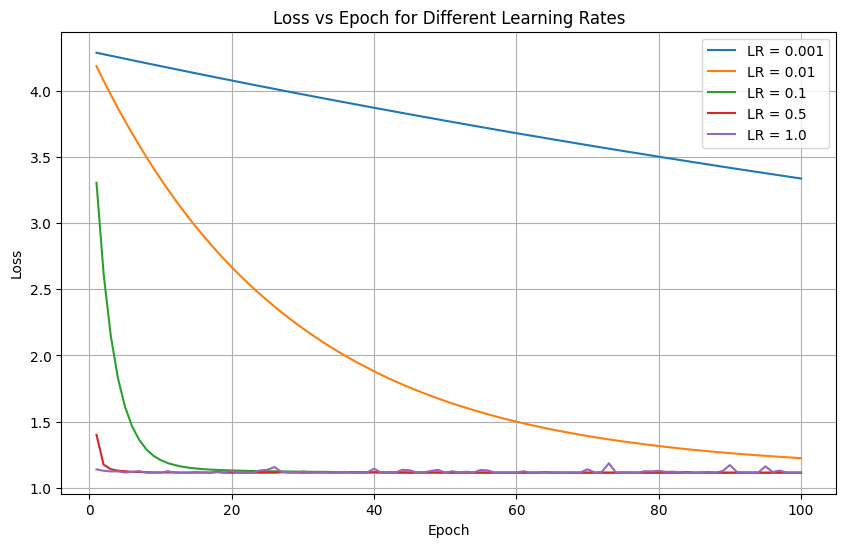

In [16]:
# Question - 3(b):

import matplotlib.pyplot as plt
import numpy as np

# Assuming SGDRidge class and relevant methods from earlier

def plot_learning_rate_tuning(trainx, trainy, lambda_reg, learning_rates, batch_size=32, max_epochs=100):

    plt.figure(figsize=(10, 6))

    # Try each learning rate and train the model
    for eta in learning_rates:
        model = SGDRidge(learning_rate=eta, lambda_reg=lambda_reg, batch_size=batch_size, max_epochs=max_epochs)
        loss_history = model.train(trainx, trainy)

        # Plot loss for each learning rate
        epochs = list(loss_history.keys())
        loss_values = list(loss_history.values())
        plt.plot(epochs, loss_values, label=f'LR = {eta}')

    # Customize the plot
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Set the optimal lambda value from Q2 (e.g., lambda_reg = 0.1)
optimal_lambda = 0.1  # Replace this with the optimal value found in Q2

# Learning rates to try
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Call the function to plot loss curves
plot_learning_rate_tuning(trainx, trainy, optimal_lambda, learning_rates)




The figure depicts the training loss as a function of epochs for different learning rates in an SGD-based Ridge regression model. When the learning rate is very small (LR = 0.001), the loss decreases gradually and remains relatively high even after many epochs, indicating slow convergence. A slightly larger learning rate (LR = 0.01) results in a faster and smoother decline in loss, demonstrating more efficient optimization while maintaining stability. For LR = 0.1, the loss drops sharply within the first few epochs and quickly converges to a low value, indicating rapid and effective convergence. In contrast, higher learning rates (LR = 0.5 and LR = 1.0) converge almost immediately but exhibit small oscillations around the minimum loss, reflecting increased variance in parameter updates due to larger step sizes. Overall, the graph illustrates that moderate learning rates achieve an optimal trade-off between convergence speed and stability, while excessively small or large learning rates are less effective.